In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

Solve the radiative transfer, the Schwarzschild, equation:
$$ dI_\nu = (-I_\nu + B_\nu(T)) n\sigma_\nu dz $$
This has the analytical solution:
$$ I_\nu(z) = I_\nu(z_0) e^{-\tau} + \int_{\tau_0}^\tau d\mu'\,e^{-(\mu-\mu')}\, B_\nu(\mu')$$
where $$\tau(z)\equiv \int_{z_0}^z dz' n\sigma_\nu(z') dz'$$

If we take a simple expression for absorbtion rate based on the density descrease, $n\sigma=\kappa e^{-z/H}$, then
$$ \tau(z) = \kappa H \left( 1- e^{-z/H}\right)$$

In [2]:
#Some constants and simple functions
hbar=1.0546e-34 #J -s
c=3.e8 #m/w
kb=1.38e-23 #J/K
h=2*3.14159*hbar
def bnu(nu,T):
    b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)
    return b
    

/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_98576/4266385238.py:7: RuntimeWarning: overflow encountered in exp
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


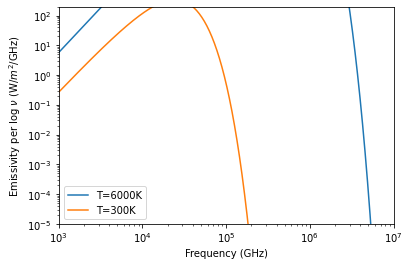

In [77]:
nulog = np.arange(9.,16,.01)
nu=10.**nulog
T=6000.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(nu/1.e9,barr*nu,label='T=6000K')
T=300.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(nu/1.e9,barr*nu,label='T=300K')
#plt.plot([c/15.e3,c/15.e3],[1.e-4,1.e2])
plt.xscale('log')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Emissivity per log $\\nu$ (W/$m^2$/GHz)')
plt.yscale('log')
plt.axis([1000,1.e7,1.e-5,200])
plt.legend()


In [4]:
rsolar=6.955e8
lsolar=3.85e26
rorbit=1.5e11
rearth=6.37e6
T=6000.
print(lsolar/(4*3.14*rsolar**2))
print(lsolar/(4*3.14*rorbit**2))
print(kb*T/h/1.e9)

63368995.28609401
1362.3496107572541
124957.71305730598


In [5]:
def bnuT(nu):
    return bnu(nu,T)
T=5800.
ans=integrate.quad(bnuT,1.e12,1.e15)
print(ans)

(61882533.77209493, 3.514951480754711e-05)


/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_98576/4266385238.py:7: RuntimeWarning: overflow encountered in exp
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)
/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_98576/4266385238.py:7: RuntimeWarning: overflow encountered in exp
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


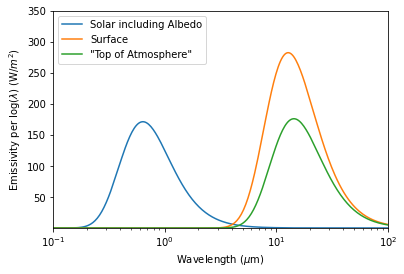

In [82]:
# To convert to W/m^2/log(wavelength), multiply by nu
wavel =c/nu
T=5750.
barr=bnu(nu,T) 
### multiply by flux reduction factor:
barr*=.7*(rsolar/rorbit)**2/4.
plt.plot(wavel*1.e6,barr*nu,label='Solar including Albedo')
T=287.
barr=bnu(nu,T) 
plt.plot(wavel*1.e6,barr*nu,label='Surface')
T=255.
barr=bnu(nu,T) # E-s/s^3  s^2/m^2 = W/m^2//Hz
plt.plot(wavel*1.e6,barr*nu,label='"Top of Atmosphere"')
plt.xscale('log')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Emissivity per log($\\lambda$) (W/$m^2$)')
#plt.yscale('log')
plt.axis([.1,100,1.e-3,350])
plt.legend()
plt.savefig('../Figures/toa.png')

In [7]:
def bnuT(nu):
    return bnu(nu,T)
T=5800.
numax=c/.3e-6 # wavelengths shorter than this are absorbed by high latitude atmosphere
ans=integrate.quad(bnuT,1.e12,numax)
# Radiance on Earth should be
# L_\odot*/4\pi*R_orbit**2
# = ans*R_\odot**2*/R_orbit**2
print(ans[0]*4*3.14*rsolar**2,ans[0]*(rsolar/rorbit)**2,(rearth/rorbit)**2)


3.759689639183023e+26 1330.39265363872 1.8034177777777776e-09


In [8]:
#Estimate for mean free path:
ppm=400.e-6
mco2=(12+2*16)*1.67e-27
ang=1.e-10
rco2=2*ang
rhoco2=ppm*1# kg/m^3, 
nco2=rhoco2/mco2
sigma=rco2**2
print(nco2*sigma)

217.74632553075665


In [90]:
km=1.e3
micron=1.e-6
lapse=6.5 #K/km
H = 8.5 #km
def Temp(z):
    Temp=Tground-lapse*z
    if Temp < 220.: Temp=220.
    return Temp
def didz(y,z,updown):
    T=Temp(z)
    didz=updown*(-y+bnu(nu,T))*kappa*np.exp(-z/H) # updown=-1 if integrating downwards
    if z<0.: didz =0.
    print(z,y,didz)
    return didz
def didz_constantdensity(y,z,updown):
    T=Temp(z)
    didz=updown*(-y+bnu(nu,T))*kappa # updown=-1 if integrating downwards
    if z<0.: didz =0.
    print(z,y,didz)
    return didz
def didz_iso(y,z,updown):
    T=Tground
    didz_iso=updown*(-y+bnu(nu,T))*kappa*np.exp(-z/H) # updown=-1 if integrating downwards
    if z<0.: didz =0.
    #print(z,y,didz)
    return didz_iso

In [10]:
y0=1366. # This is the total intensity integrated over all frequency.
# B_nu has dimensions of W/m^2 per Hz
# Divide by the typical frequency band
bandwidth=1.e14
y0=y0/bandwidth
wavel=5.*micron
nu=c/wavel
Tground=288.
t=np.arange(200.,0.1,-.1) # 1 cm^{-1} = 1 (10^{-5} km)^{-1} = 10^5 km^{-1} in km
updown = -1
kappa=.1*km#*np.exp(200./H) # 
inu=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e10, atol=1.e-10) # for down

200.0 [1.366e-11] [8.24335015e-20]
199.9 [1.366e-11] [8.34090345e-20]
199.9 [1.366e-11] [8.34090345e-20]
199.8 [1.366e-11] [8.43961122e-20]
199.8 [1.366e-11] [8.43961122e-20]
-800.1999999999432 [1.36549802e-11] 0.0
-800.1999999999432 [1.36599578e-11] 0.0


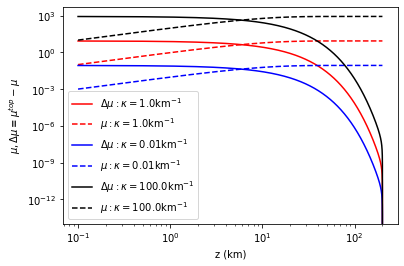

In [15]:
### mu
kappa=1. #/km
mu=kappa*H*(1.-np.exp(-t/H)) ##t = z 
plt.plot(t,-mu+mu[-1],'-r',label='$\\Delta\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
plt.plot(t,mu,'--r',label='$\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
kappa=.01 #/km
mu=kappa*H*(1.-np.exp(-t/H))
plt.plot(t,-mu+mu[-1],'-b',label='$\\Delta\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
plt.plot(t,mu,'--b',label='$\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
kappa=100. #/km
mu=kappa*H*(1.-np.exp(-t/H))
plt.plot(t,-mu+mu[-1],'-k',label='$\\Delta\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
plt.plot(t,mu,'--k',label='$\\mu: \\kappa=$'+str(kappa)+'km$^{-1}$')
plt.legend()
plt.xlabel('z (km)')
plt.ylabel('$\\mu,\\Delta\mu\equiv\\mu^{top}-\\mu$')
plt.yscale('log')
plt.xscale('log')
#plt.axis([1.,200,1.e-3,10000])

/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_98576/4266385238.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


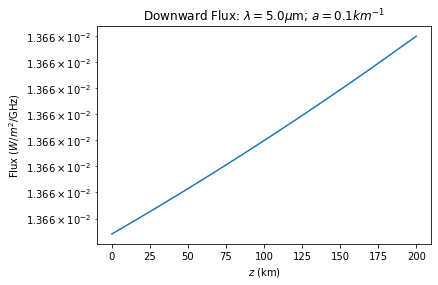

In [12]:
plt.plot(t,inu*1.e9)
plt.yscale('log')
#plt.xscale('log')

plt.title('Downward Flux: $\\lambda=$'+str(wavel/1.e-6)+'$\\mu$m; $a=$'+str(kappa/km)+'$km^{-1}$')
plt.xlabel('$z$ (km)')
plt.ylabel('Flux ($W/m^2$/GHz)')
earth_radiation=bnu(Tground,nu)*1.e9
plt.plot([.1,200],[earth_radiation,earth_radiation])
#plt.axis([5,20,1.e-345,1.e-5])


## Constant Density

In [53]:
## Upward flux
z0=.1
t=np.arange(z0,200.,.1) # 1 cm^{-1} = 1 (10^{-5} km)^{-1} = 10^5 km^{-1} in km
kappa=1. # per km
lapse=6.5 #K/km
wavel=15.*micron
nu=c/wavel
y0=bnu(nu,Temp(z0))
updown=1
inuup1=integrate.odeint(didz_constantdensity, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
y0=bnu(nu,Temp(z0))
kappa=.1 # per km
inuup2=integrate.odeint(didz_constantdensity, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
y0=bnu(nu,Temp(z0))
kappa=.01 # per km
inuup3=integrate.odeint(didz_constantdensity, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)


0.1 [1.35680714e-11] [0.]
0.10000063245553203 [1.35680714e-11] [-6.72503709e-19]
0.10000063245553203 [1.35680714e-11] [-6.72503284e-19]
0.10000126491106406 [1.35680714e-11] [-1.34500655e-18]
0.10000126491106406 [1.35680714e-11] [-1.34500613e-18]
0.10632582023140082 [1.35680502e-11] [-6.70434343e-15]
0.10632582023140082 [1.35680502e-11] [-6.7044131e-15]
0.11265037555173757 [1.35679866e-11] [-1.33635596e-14]
0.11265037555173757 [1.35679868e-11] [-1.33636985e-14]
0.11897493087207432 [1.35678812e-11] [-1.99793389e-14]
0.11897493087207432 [1.35678813e-11] [-1.99794769e-14]
0.1822204840754419 [1.35645715e-11] [-8.37977552e-14]
0.1822204840754419 [1.35645758e-11] [-8.38020809e-14]
0.24546603727880947 [1.35573762e-11] [-1.43577581e-13]
0.24546603727880947 [1.3557364e-11] [-1.43565369e-13]
0.30871159048217706 [1.35465015e-11] [-1.99524754e-13]
0.30871159048217706 [1.35464948e-11] [-1.99518023e-13]
0.37195714368554467 [1.35322074e-11] [-2.51898945e-13]
0.37195714368554467 [1.35322011e-11] [-2.51

0.013568071435929474 0.0009941406474216887 10.461538461538462


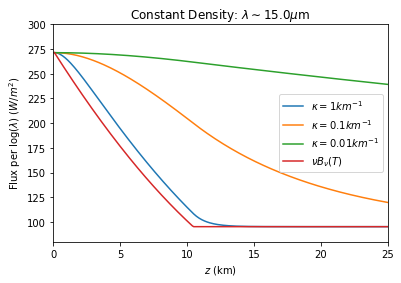

In [55]:
lapse=6.5
trop = (Tground-220)/lapse
T=np.zeros(np.size(t))
for i,z in enumerate(t):
    T[i]=Temp(z)
mu=kappa*H*(1.-np.exp(-t/H))
plt.plot(t,inuup1*nu,label='$\\kappa=1km^{-1}$')
plt.plot(t,inuup2*nu,label='$\\kappa=0.1km^{-1}$')
plt.plot(t,inuup3*nu,label='$\\kappa=0.01km^{-1}$')
plt.plot(t,bnu(nu,T)*nu,label='$\\nu B_\\nu(T)$')
plt.title('Constant Density: $\\lambda\sim$'+str(wavel/1.e-6)+'$\\mu$m')
plt.xlabel('$z$ (km)')
plt.legend()
plt.ylabel('Flux per log($\\lambda$) ($W/m^2$)')
trop = (Tground-220)/lapse#220=tground-lapse*z
#plt.plot([trop,trop],[1.e-3,1])
print(y0*1.e9,mu[0],trop)
plt.axis([0,25,80,300])
plt.savefig('../Figures/co2flux_cd.png')

In [57]:
kappa=.02 # co2 doubles
inuup3D=integrate.odeint(didz_constantdensity, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
kappa=2. # co2 doubles
inuup1D=integrate.odeint(didz_constantdensity, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
kappa=.2 # co2 doubles
inuup2D=integrate.odeint(didz_constantdensity, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)


0.1 [1.35680714e-11] [0.]
0.10000063245553203 [1.35680714e-11] [-1.34500742e-20]
0.10000126491106406 [1.35680714e-11] [-2.69001477e-20]
0.10632582023140082 [1.3568071e-11] [-1.34503857e-16]
0.10632582023140082 [1.3568071e-11] [-1.34503858e-16]
0.11265037555173757 [1.35680697e-11] [-2.68933263e-16]
0.11265037555173757 [1.35680697e-11] [-2.68933266e-16]
0.11897493087207432 [1.35680676e-11] [-4.03315121e-16]
0.11897493087207432 [1.35680676e-11] [-4.03315124e-16]
0.1822204840754419 [1.35679997e-11] [-1.74451854e-15]
0.1822204840754419 [1.35679997e-11] [-1.74451867e-15]
0.24546603727880947 [1.3567847e-11] [-3.08096855e-15]
0.24546603727880947 [1.3567847e-11] [-3.08096842e-15]
0.30871159048217706 [1.356761e-11] [-4.4126654e-15]
0.30871159048217706 [1.356761e-11] [-4.4126654e-15]
0.37195714368554467 [1.3567289e-11] [-5.73961066e-15]
0.37195714368554467 [1.3567289e-11] [-5.73961066e-15]
1.0044126757192204 [1.35595204e-11] [-1.87479536e-14]
1.0044126757192204 [1.35595203e-11] [-1.87479523e-14]


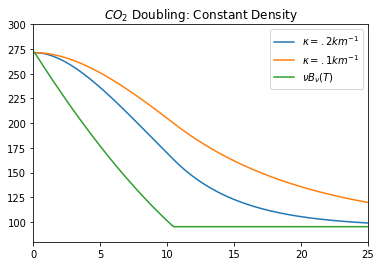

In [64]:
plt.plot(t,inuup2D*nu,label='$\\kappa=.2km^{-1}$')
plt.plot(t,inuup2*nu,label='$\\kappa=.1km^{-1}$')
plt.plot(t,bnu(nu,T)*nu,label='$\\nu B_\\nu(T)$')
plt.title('$CO_2$ Doubling: Constant Density')
plt.legend()
plt.axis([0,25,80,300])

plt.savefig('../Figures/co2doubling_cd_k.1.png')

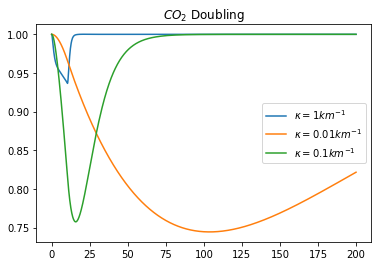

In [58]:
plt.plot(t,inuup1D/inuup1,label='$\\kappa=1km^{-1}$')
plt.plot(t,inuup3D/inuup3,label='$\\kappa=0.01km^{-1}$')
plt.plot(t,inuup2D/inuup2,label='$\\kappa=0.1km^{-1}$')
plt.title('$CO_2$ Doubling')
plt.legend()
plt.savefig('../Figures/co2doubling_cd.png')

## Exponentially Decreasing Density

In [49]:
## Upward flux
z0=.1
t=np.arange(z0,200.,.1) # 1 cm^{-1} = 1 (10^{-5} km)^{-1} = 10^5 km^{-1} in km
kappa=1. # per km
lapse=6.5 #K/km
wavel=15.*micron
nu=c/wavel
y0=bnu(nu,Temp(z0))
updown=1
inuup1=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
y0=bnu(nu,Temp(z0))
kappa=.1 # per km
inuup2=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
y0=bnu(nu,Temp(z0))
kappa=.01 # per km
inuup3=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)


0.1 [1.35680714e-11] [0.]
0.10000063245553203 [1.35680714e-11] [-6.64638209e-19]
0.10000063245553203 [1.35680714e-11] [-6.64637794e-19]
0.10000126491106406 [1.35680714e-11] [-1.32927548e-18]
0.10000126491106406 [1.35680714e-11] [-1.32927506e-18]
0.10632582023140082 [1.35680504e-11] [-6.62124742e-15]
0.10632582023140082 [1.35680505e-11] [-6.62133004e-15]
0.11265037555173757 [1.35679877e-11] [-1.31886581e-14]
0.11265037555173757 [1.35679878e-11] [-1.31888225e-14]
0.11897493087207432 [1.35678837e-11] [-1.97040755e-14]
0.11897493087207432 [1.35678838e-11] [-1.97042384e-14]
0.1822204840754419 [1.35646322e-11] [-8.20798354e-14]
0.1822204840754419 [1.35646368e-11] [-8.20843424e-14]
0.24546603727880947 [1.35576143e-11] [-1.39721882e-13]
0.24546603727880947 [1.35575975e-11] [-1.39705617e-13]
0.30871159048217706 [1.35470655e-11] [-1.92952039e-13]
0.30871159048217706 [1.35470553e-11] [-1.92942281e-13]
0.37195714368554467 [1.35332849e-11] [-2.42145015e-13]
0.37195714368554467 [1.35332757e-11] [-2.

0.013568071435929474 0.0009941406474216887 10.461538461538462


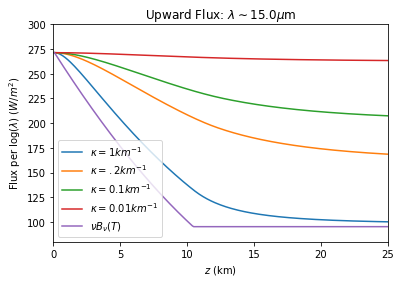

In [51]:
lapse=6.5
trop = (Tground-220)/lapse
T=np.zeros(np.size(t))
for i,z in enumerate(t):
    T[i]=Temp(z)
mu=kappa*H*(1.-np.exp(-t/H))
plt.plot(t,inuup1*nu,label='$\\kappa=1km^{-1}$')
plt.plot(t,inuup2D*nu,label='$\\kappa=.2km^{-1}$')
plt.plot(t,inuup2*nu,label='$\\kappa=0.1km^{-1}$')
plt.plot(t,inuup3*nu,label='$\\kappa=0.01km^{-1}$')
plt.plot(t,bnu(nu,T)*nu,label='$\\nu B_\\nu(T)$')
plt.title('Upward Flux: $\\lambda\sim$'+str(wavel/1.e-6)+'$\\mu$m')
plt.xlabel('$z$ (km)')
plt.legend()
plt.ylabel('Flux per log($\\lambda$) ($W/m^2$)')
trop = (Tground-220)/lapse#220=tground-lapse*z
#plt.plot([trop,trop],[1.e-3,1])
print(y0*1.e9,mu[0],trop)
plt.axis([0,25,80,300])
plt.savefig('../Figures/co2flux.png')

In [42]:
kappa=.02 # co2 doubles
inuup3D=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
kappa=2. # co2 doubles
inuup1D=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
kappa=.2 # co2 doubles
inuup2D=integrate.odeint(didz, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)



0.1 [1.35680714e-11] [0.]
0.10000063245553203 [1.35680714e-11] [-1.32927642e-20]
0.10000126491106406 [1.35680714e-11] [-2.65855258e-20]
0.10632582023140082 [1.3568071e-11] [-1.32831937e-16]
0.10632582023140082 [1.3568071e-11] [-1.32831944e-16]
0.11265037555173757 [1.35680698e-11] [-2.65393026e-16]
0.11265037555173757 [1.35680698e-11] [-2.65393041e-16]
0.11897493087207432 [1.35680677e-11] [-3.97710211e-16]
0.11897493087207432 [1.35680677e-11] [-3.97710226e-16]
0.1822204840754419 [1.35680009e-11] [-1.70754286e-15]
0.1822204840754419 [1.3568001e-11] [-1.70754345e-15]
0.24546603727880947 [1.35678522e-11] [-2.99336794e-15]
0.24546603727880947 [1.35678522e-11] [-2.99336716e-15]
0.30871159048217706 [1.35676228e-11] [-4.25552355e-15]
0.30871159048217706 [1.35676228e-11] [-4.25552338e-15]
0.37195714368554467 [1.35673144e-11] [-5.49434965e-15]
0.37195714368554467 [1.35673144e-11] [-5.49434948e-15]
1.0044126757192204 [1.35601958e-11] [-1.66704675e-14]
1.0044126757192204 [1.35601923e-11] [-1.66704

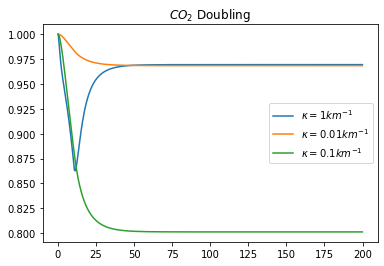

In [47]:
plt.plot(t,inuup1D/inuup1,label='$\\kappa=1km^{-1}$')
plt.plot(t,inuup3D/inuup3,label='$\\kappa=0.01km^{-1}$')
plt.plot(t,inuup2D/inuup2,label='$\\kappa=0.1km^{-1}$')
plt.title('$CO_2$ Doubling')
plt.legend()
plt.savefig('../Figures/co2doubling.png')

In [165]:
kappa=.00001*km # per km
lapse=6.5 #K/km
wavel=1.*micron
def Temp(z):
    Temp=Tground-lapse*z
    if Temp < 220.: Temp=220.
    return Temp
def didz(y,z):
    T=Temp(z)
    didz=(-y+bnu(nu,T))*kappa*np.exp(-z/H) # minus sign since we're integrating downwards
    #print(T,nu,bnu(nu,T))
    return didz
nu=c/wavel
y0=bnu(nu,Tground)
inuup00001=integrate.odeint(didz, y0, t)

4.575100688599269e-26


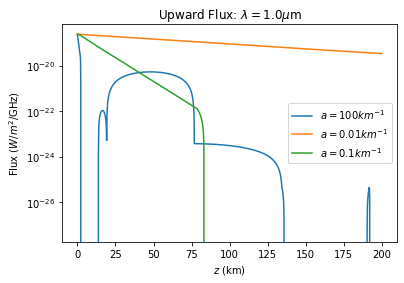

In [166]:
plt.plot(t,inuup1*1.e9,label='$a=100km^{-1}$')
plt.plot(t,inuup00001*1.e9,label='$a=0.01km^{-1}$')
plt.plot(t,inuup0001*1.e9,label='$a=0.1km^{-1}$')
plt.yscale('log')
plt.title('Upward Flux: $\\lambda=$'+str(wavel/1.e-6)+'$\\mu$m')
plt.xlabel('$z$ (km)')
plt.legend()
plt.ylabel('Flux ($W/m^2$/GHz)')
print(bnu(nu,220)*1.e9)

In [ ]:
## Optical Depth

## Constant temperature

In [92]:
y0=bnu(nu,Temp(z0))
kappa=.01 # co2 doubles
inuup3=integrate.odeint(didz_iso, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
y0=bnu(nu,Temp(z0))
kappa=1. # co2 doubles
inuup1=integrate.odeint(didz_iso, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)
y0=bnu(nu,Temp(z0))
kappa=.1 # co2 doubles
inuup2=integrate.odeint(didz_iso, y0, t,args=(updown,),rtol=1.e-11, atol=1.e-15)


/var/folders/yt/44r1mdln1k7_0595qvt97vd00000gn/T/ipykernel_98576/4266385238.py:7: RuntimeWarning: overflow encountered in exp
  b=(2*np.pi*h*nu**3/c**2)/(np.exp(h*nu/(kb*T))-1.)


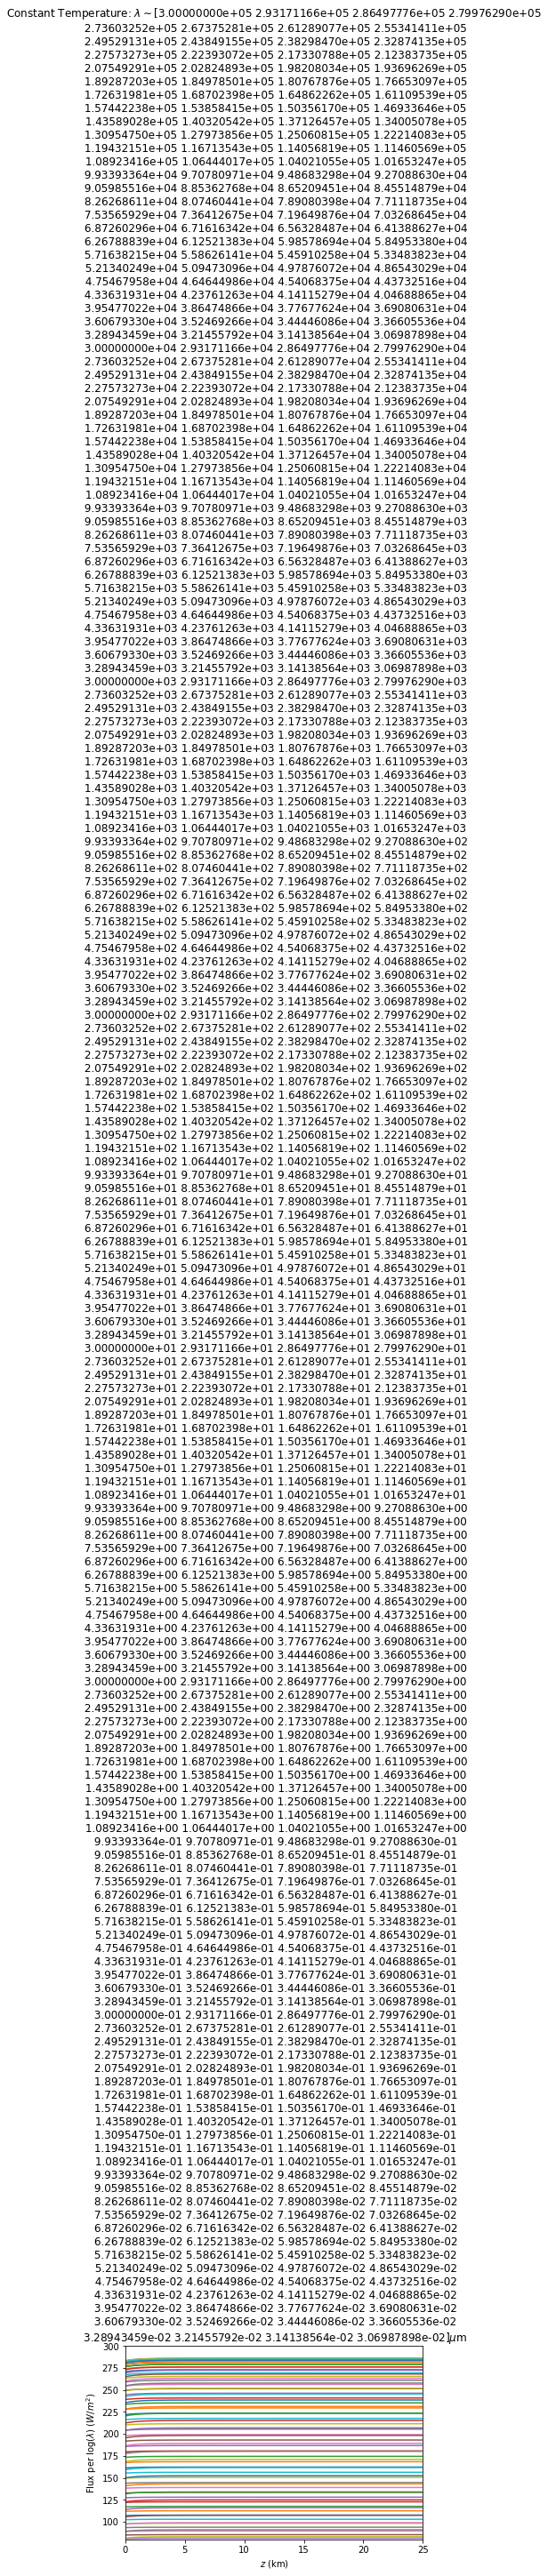

In [94]:
plt.plot(t,inuup1*nu,label='$\\kappa=1km^{-1}$')
#plt.plot(t,inuup2*nu,label='$\\kappa=0.1km^{-1}$')
#plt.plot(t,inuup3*nu,label='$\\kappa=0.01km^{-1}$')
#plt.plot(t,bnu(nu,T)*nu,label='$\\nu B_\\nu(T)$')
plt.title('Constant Temperature: $\\lambda\sim$'+str(wavel/1.e-6)+'$\\mu$m')
plt.xlabel('$z$ (km)')
#plt.legend()
plt.ylabel('Flux per log($\\lambda$) ($W/m^2$)')
trop = (Tground-220)/lapse#220=tground-lapse*z
#plt.plot([trop,trop],[1.e-3,1])
#print(y0*1.e9,mu[0],trop)
plt.axis([0,25,80,300])
plt.savefig('../Figures/fl_constant.png')

## Cross Sections

In [66]:
o2w=246e-9
e=h*c/o2w
ev=1.6e-19
print(e/ev)

5.050489045731708


In [69]:
e=5.17*ev
print(h*c/e)

2.403134052707931e-07


In [71]:
## Oxygen density at 15km:
n=0.21*1.2/(32*1.67e-27)
print(n)

4.7155688622754485e+24


In [73]:
np.log(32)*8

27.725887222397812

In [74]:
32*np.exp(-15/8.)

4.907358939037711

In [75]:
np.exp(-5)

0.006737946999085467